<a href="https://colab.research.google.com/github/dandawidhia/science-computing/blob/main/Sesi3_SC_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('seaborn-poster')

<ipython-input-7-4e313f001330>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use ('seaborn-poster')


In [8]:
x = [0,1,2,3,4,5]
y = [1,3,3,5,2,5]

In [14]:
f = interp1d(x,y)

x_1in = np.linspace (0,5,100)
y_1in = f(x_1in)
  
y_ask = f(3.1)
print(y_ask)

4.699999999999999


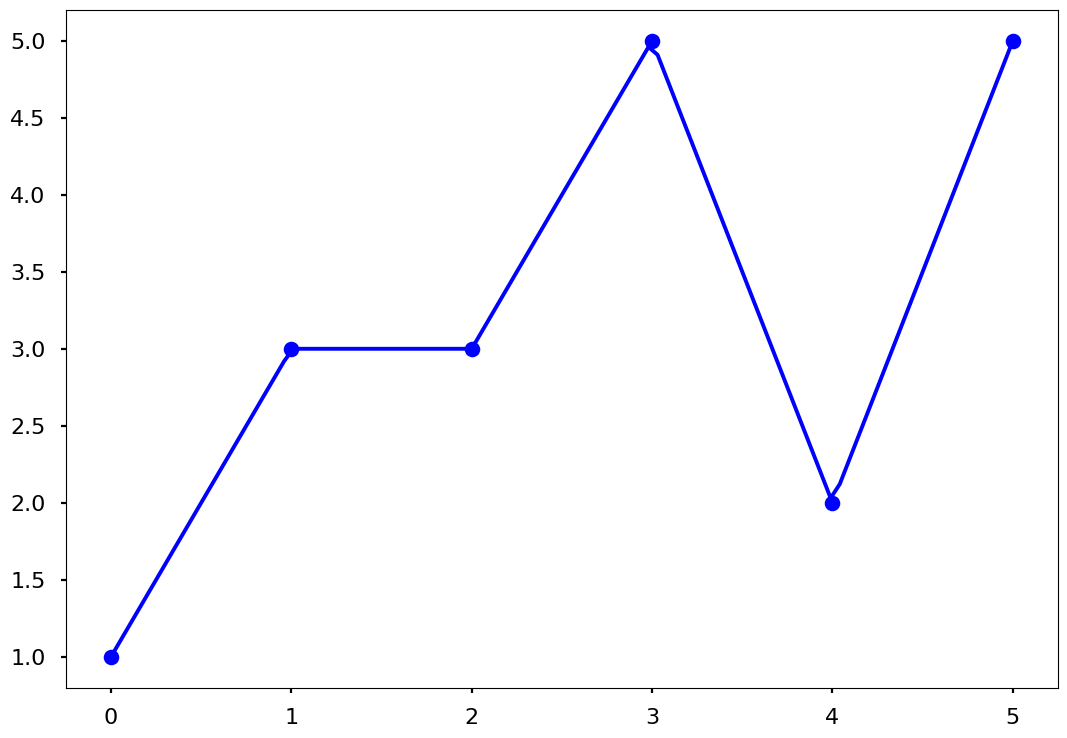

In [17]:
plt.plot(x,y,'ob')
plt.plot(x_1in,y_1in,'b')
plt.plot(3.1,f(3.1),'')
plt.show()

In [24]:
from matplotlib.projections import polar
from numpy.ma.extras import corrcoef
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  #the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range (n-j):
      coef [i][j]=\
      (coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i])

  return coef

def newton_poly(coef,x_data,x):

  n = len(x_data)-1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k]+(x-x_data[n-k])*p
  return p


<ipython-input-24-85f3ba980df0>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


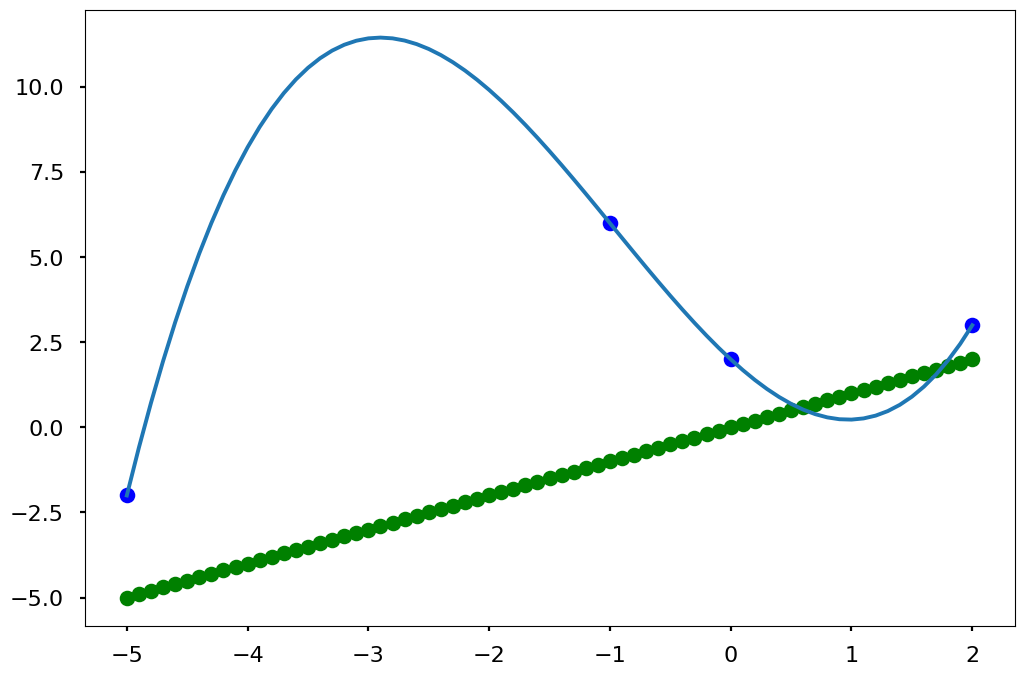

In [26]:
x = np.array([-5,-1,0,2])
y = np.array([-2,6,2,3])
#get the divided difference coef
a_s = divided_diff(x,y)[0,:]

#evaluate on new data points
x_new=np.arange(-5,2.1,.1)
y_new = newton_poly(a_s,x,x_new)

plt.figure(figsize=(12,8))
plt.plot(x,y,'bo')
plt.plot(x_new,x_new,'go')
plt.plot(x_new,y_new)




In [28]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

#generate x and y
x = np.linspace(0,1,101)
y = 1 + x + x * np.random.random(len(x))

#assemble matrix A
A = np.vstack([x,np.ones(len(x))]).T

#turn y into a column vector
y = y[:,np.newaxis]

#direct least square regrresion
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.63415458]
 [0.96860438]]


<ipython-input-28-d1ccf452d4ea>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


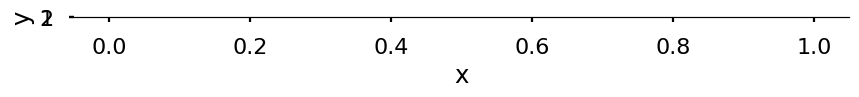

In [30]:
#plot the results
plt.figure(figsize = (10,0))
plt.plot(x,y,'b.')
plt.plot(x,alpha[0]*x + alpha[1],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [31]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.63415458]
 [0.96860438]]


In [32]:
alpha = np.linalg.lstsq(A,y,rcond=None)[0]
print(alpha)

[[1.63415458]
 [0.96860438]]


[1.56086758 0.98962643]


/usr/local/lib/python3.9/dist-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.9/dist-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/usr/local/lib/python3.9/dist-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)
/usr/local/lib/python3.9/dist-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[1, 2] += ty


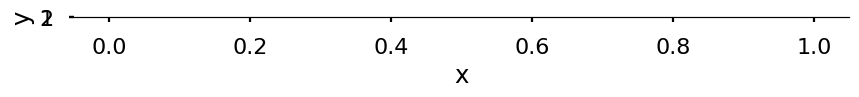

In [34]:
#generate x and y
x = np.linspace(0,1,101)
y = 1 + x + x * np.random.random(len(x))

def func(x,a,b):
  y = a*x + b
  return y

alpha = optimize.curve_fit(func,xdata = x,ydata = y)[0]
print (alpha)

#plot the results
plt.figure(figsize = (10,0))
plt.plot(x,y,'b.')
plt.plot(x,alpha[0]*x + alpha[1],'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
X = [0,1,2,3,4,5]
Y = [1,3,3,5,2,2]

In [39]:
f = CubicSpline(x,y,bc_type='natural')

x_cub = np.linspace(0,5,100)
y_cub = f(x_cub)

y_ask = f(2.9)
print (y_ask)

768424.8032436854


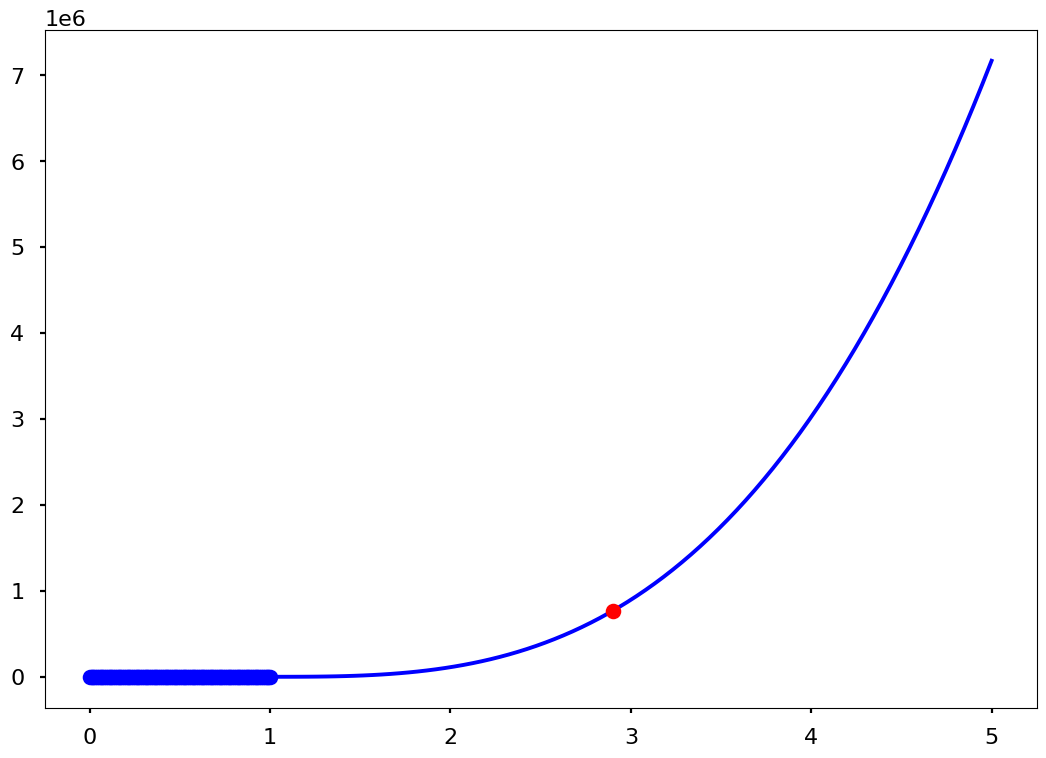

In [40]:
plt.plot(x,y,'bo')
plt.plot(x_cub,y_cub,'b')
plt.plot(2.9,f(2.9),'ro')
plt.show()